In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots
from styles import set_plot_style
from order import *
set_plot_style("prism_rain")

saved figs/Encap79_IVg_sequence_Alisson_04_sept_metadata.png


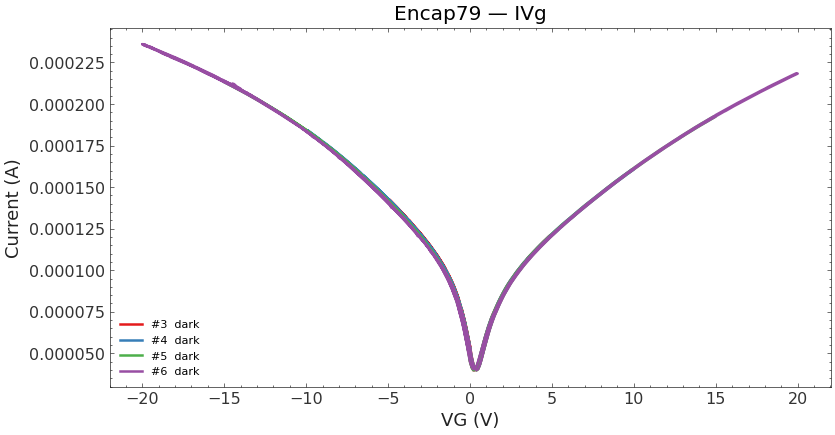

In [15]:
METADATA_CSV = "Alisson_04_sept_metadata.csv"        # path to the table you pasted
BASE_DIR     = Path(".")             # where the raw CSVs live, e.g. "Alisson_04_sept/"
CHIP_NUMBER  = 79.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem
good_ivgs = [3,4,5,6]  # the _NN.csv numbers you want

meta_only_good_ivg = meta.filter(
    (pl.col("proc") == "IVg") & pl.col("file_idx").is_in(good_ivgs)
)

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta_only_good_ivg, BASE_DIR, tag) 

saved figs/Encap79_IVg_sequence_Alisson_04_sept_metadata.png


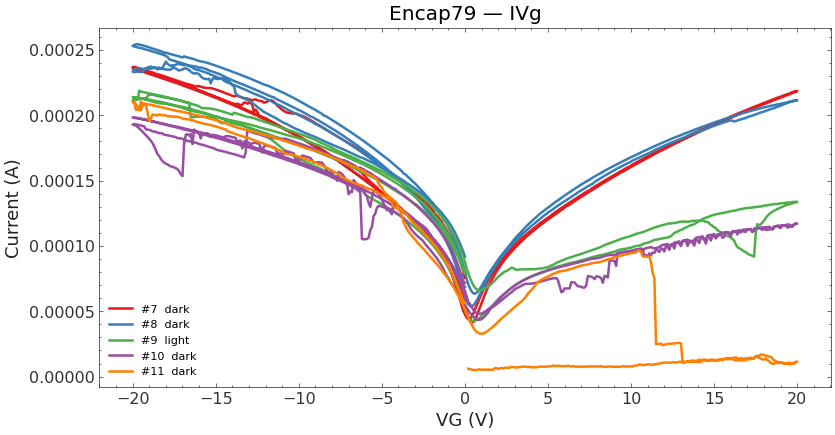

In [16]:
good_ivgs = [7,8,9,10,11]  # the _NN.csv numbers you want

meta_only_good_ivg = meta.filter(
    (pl.col("proc") == "IVg") & pl.col("file_idx").is_in(good_ivgs)
)

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta_only_good_ivg, BASE_DIR, tag) 

In [17]:
METADATA_CSV = "Alisson_04_sept_metadata.csv"        # path to the table you pasted
BASE_DIR     = Path(".")             # where the raw CSVs live, e.g. "Alisson_04_sept/"
CHIP_NUMBER  = 71.0  
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
bad_its = [3,10]
meta_no_bad = meta.filter(~((pl.col("proc") == "ITS") & (pl.col("file_idx").is_in(bad_its))))
# A tag to help separate different metadata files/folders in outputs
tag = Path(METADATA_CSV).stem

saved figs/Encap71_IVg_sequence_Alisson_04_sept_metadata.png


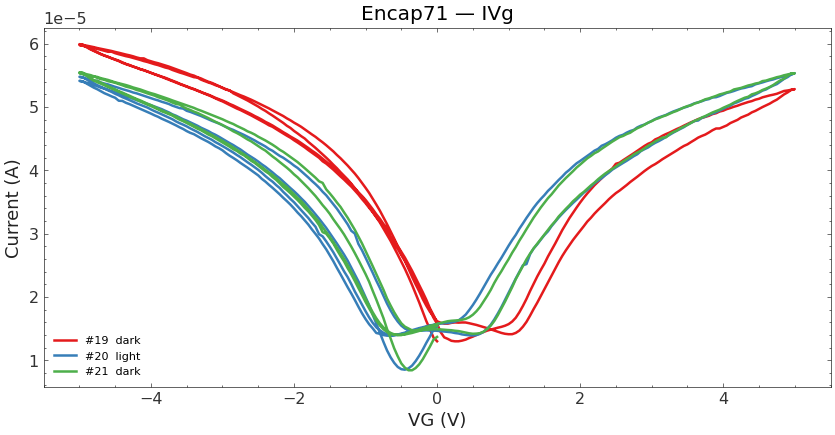

In [18]:
good_ivgs = [19,20,21]  # the _NN.csv numbers you want

meta_only_good_ivg = meta.filter(
    (pl.col("proc") == "IVg") & pl.col("file_idx").is_in(good_ivgs)
)

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta_only_good_ivg, BASE_DIR, tag) 
#plot_ivg_sequence(meta, BASE_DIR, tag) 

saved figs/Encap71_IVg_sequence_Alisson_04_sept_metadata.png


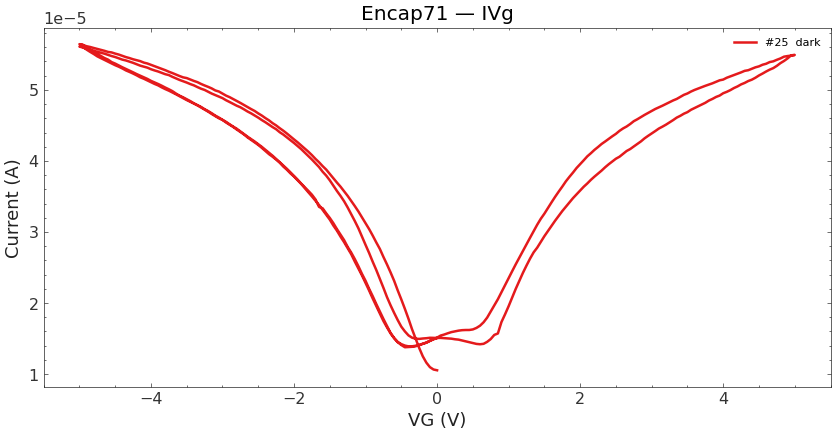

In [19]:
good_ivgs = [25]  # the _NN.csv numbers you want

meta_only_good_ivg = meta.filter(
    (pl.col("proc") == "IVg") & pl.col("file_idx").is_in(good_ivgs)
)

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta_only_good_ivg, BASE_DIR, tag) 

saved figs/chip71_ITS_overlay_Vgm2p0_455nm_Alisson_04_sept_metadata.png


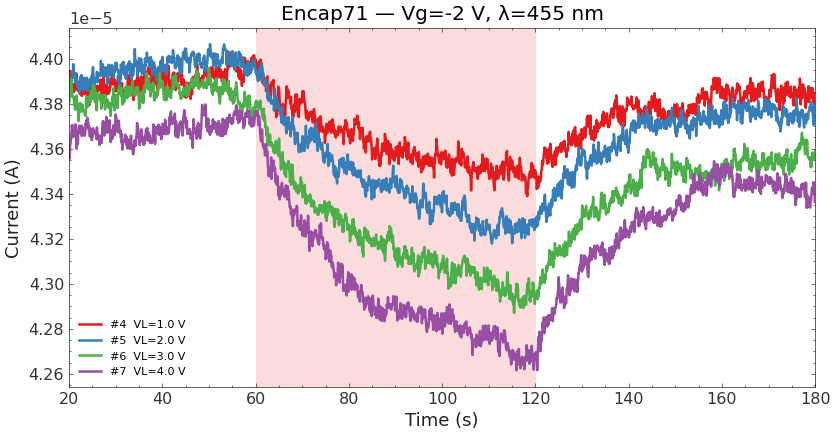

In [7]:


# then use meta_no_bad everywhere you plot ITS
plot_its_by_vg(meta_no_bad, BASE_DIR, tag, vgs=[-2.0], wavelengths=[455.0])    # or all Vg 

saved figs/Encap71_IVg_sequence_Alisson_04_sept_metadata.png


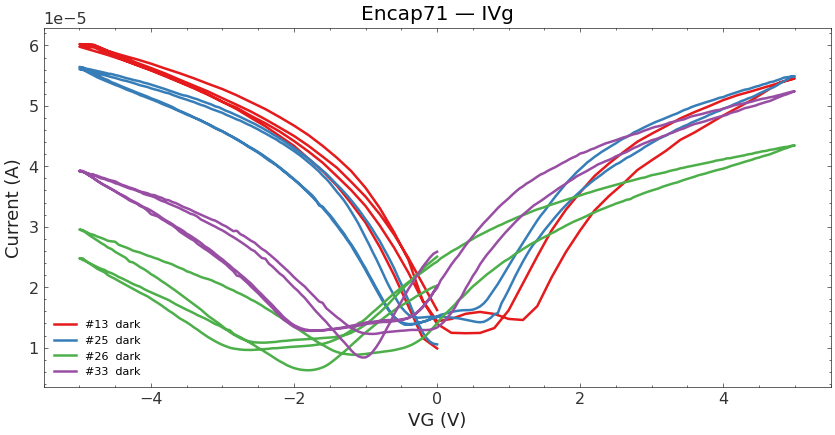

In [8]:
good_ivgs = [13, 25, 26, 33]  # the _NN.csv numbers you want

meta_only_good_ivg = meta.filter(
    (pl.col("proc") == "IVg") & pl.col("file_idx").is_in(good_ivgs)
)

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta_only_good_ivg, BASE_DIR, tag) 

saved figs/chip71_ITS_overlay_Vgm2p0_455nm_Alisson_04_sept_metadata.png


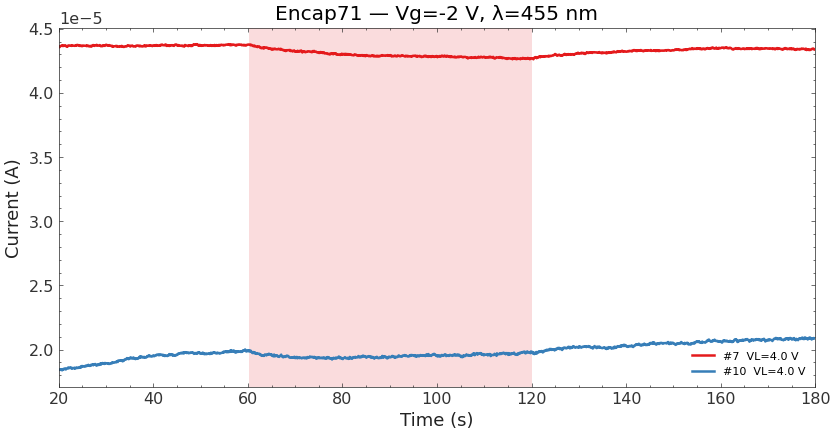

In [9]:
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
bad_its = [3,4,5,6]
meta_no_bad = meta.filter(~((pl.col("proc") == "ITS") & (pl.col("file_idx").is_in(bad_its))))
# A tag to help separate different metadata files/folders in outputs
tag = Path(METADATA_CSV).stem

# then use meta_no_bad everywhere you plot ITS
plot_its_by_vg(meta_no_bad, BASE_DIR, tag, vgs=[-2.0], wavelengths=[455.0])    # or all Vg 

saved figs/Chip71_IVg_last_day1_first_day2_Alisson_04_sept_metadata_vs_Alisson_05_sept_metadata.png


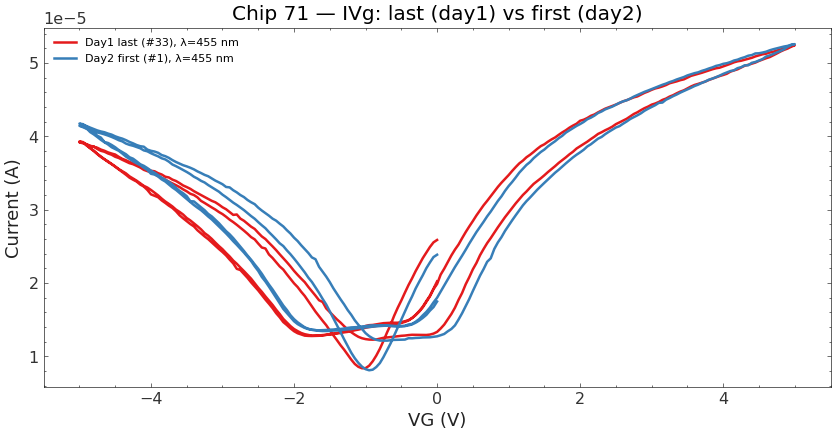

In [10]:
from pathlib import Path
import polars as pl
import matplotlib.pyplot as plt
from order import _read_measurement

def plot_ivg_last_of_day1_vs_first_of_day2(
    meta_day1: pl.DataFrame,
    meta_day2: pl.DataFrame,
    base_dir_day1: Path,
    base_dir_day2: Path,
    tag: str,
):
    # keep only IVg rows, already per-chip if you used load_and_prepare_metadata(...)
    ivg1 = meta_day1.filter(pl.col("proc") == "IVg").sort("file_idx")
    ivg2 = meta_day2.filter(pl.col("proc") == "IVg").sort("file_idx")

    if ivg1.height == 0 or ivg2.height == 0:
        print("[warn] one of the days has no IVg runs")
        return

    r1 = ivg1.tail(1).row(0, named=True)   # last of day 1
    r2 = ivg2.head(1).row(0, named=True)   # first of day 2

    p1 = base_dir_day1 / r1["source_file"]
    p2 = base_dir_day2 / r2["source_file"]

    d1 = _read_measurement(p1)
    d2 = _read_measurement(p2)

    if not {"VG","I"} <= set(d1.columns):
        print(f"[warn] {p1} lacks VG/I; got {d1.columns}")
        return
    if not {"VG","I"} <= set(d2.columns):
        print(f"[warn] {p2} lacks VG/I; got {d2.columns}")
        return

    plt.figure()
    lbl1 = f"Day1 last (#{int(r1['file_idx'])})"
    lbl2 = f"Day2 first (#{int(r2['file_idx'])})"
    # optionally show wavelength if present in metadata
    if "Laser wavelength" in ivg1.columns and ivg1["Laser wavelength"].drop_nulls().len() > 0:
        lbl1 += f", λ={float(ivg1['Laser wavelength'].drop_nulls().median()):.0f} nm"
    if "Laser wavelength" in ivg2.columns and ivg2["Laser wavelength"].drop_nulls().len() > 0:
        lbl2 += f", λ={float(ivg2['Laser wavelength'].drop_nulls().median()):.0f} nm"

    plt.plot(d1["VG"], d1["I"], label=lbl1)
    plt.plot(d2["VG"], d2["I"], label=lbl2)

    chip_txt = f"Chip {int(meta_day1['Chip number'][0])}" if 'Chip number' in meta_day1.columns else "Chip"
    plt.xlabel("VG (V)")
    plt.ylabel("Current (A)")
    plt.title(f"{chip_txt} — IVg: last (day1) vs first (day2)")
    plt.legend(fontsize=8)
    plt.tight_layout()

    out = FIG_DIR / f"{chip_txt.replace(' ','')}_IVg_last_day1_first_day2_{tag}.png"
    plt.savefig(out, dpi=200)
    print(f"saved {out}")
    
# Day 1
CSV1 = "Alisson_04_sept_metadata.csv"
BASE1 = Path(".")
meta1 = load_and_prepare_metadata(CSV1, CHIP_NUMBER)

# Day 2
CSV2 = "Alisson_05_sept_metadata.csv"
BASE2 = Path(".")
meta2 = load_and_prepare_metadata(CSV2, CHIP_NUMBER)

tag = f"{Path(CSV1).stem}_vs_{Path(CSV2).stem}"

plot_ivg_last_of_day1_vs_first_of_day2(meta1, meta2, BASE1, BASE2, tag)


saved figs/chip71_ITS_overlay_Vgm3p0_455nm_Alisson_05_sept_metadata.png
saved figs/chip71_ITS_overlay_Vg3p0_455nm_Alisson_05_sept_metadata.png
saved figs/chip71_ITS_overlay_Vgm5p0_455nm_Alisson_05_sept_metadata.png
saved figs/chip71_ITS_overlay_Vg5p0_455nm_Alisson_05_sept_metadata.png


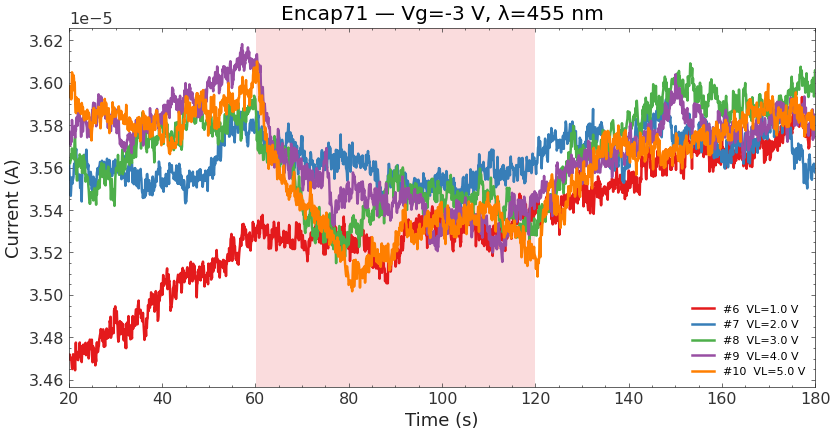

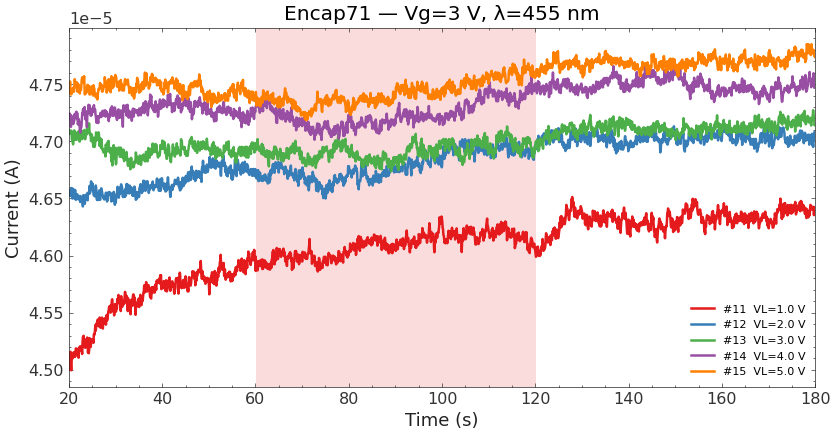

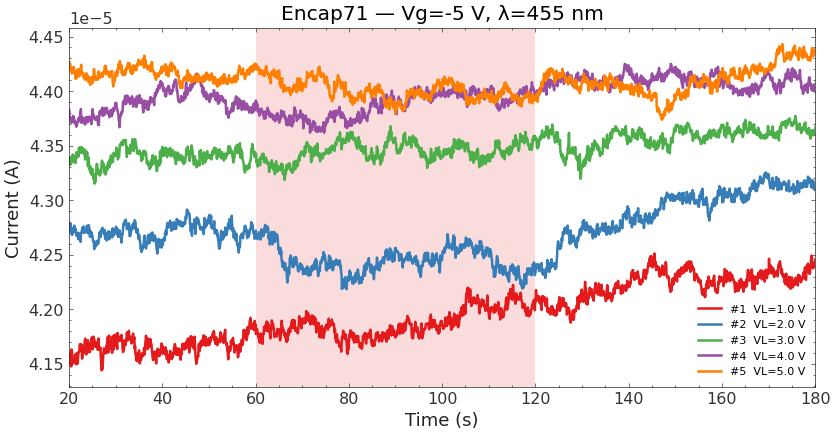

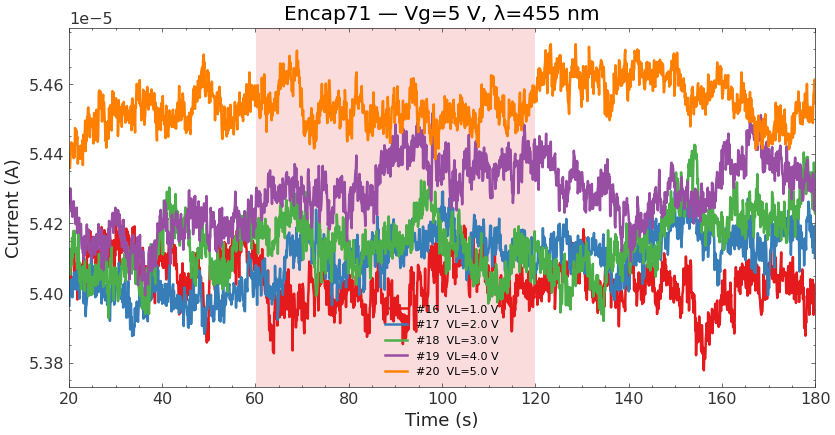

In [20]:
METADATA_CSV = "Alisson_05_sept_metadata.csv"        # path to the table you pasted
BASE_DIR     = Path(".")             # where the raw CSVs live, e.g. "Alisson_04_sept/"
CHIP_NUMBER  = 71.0  

meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)

tag = Path(METADATA_CSV).stem
# then use meta_no_bad everywhere you plot ITS
plot_its_by_vg(meta, BASE_DIR, tag, vgs=[-3.0], wavelengths=[455.0]) 
plot_its_by_vg(meta, BASE_DIR, tag, vgs=[3.0], wavelengths=[455.0]) 
plot_its_by_vg(meta, BASE_DIR, tag, vgs=[-5.0], wavelengths=[455.0]) 
plot_its_by_vg(meta, BASE_DIR, tag, vgs=[5.0], wavelengths=[455.0])  

saved figs/chip71_ITS_overlay_Vgm3p0_365nm_Alisson_05_sept_metadata.png
saved figs/chip71_ITS_overlay_Vg3p0_365nm_Alisson_05_sept_metadata.png
saved figs/chip71_ITS_overlay_Vgm5p0_365nm_Alisson_05_sept_metadata.png
saved figs/chip71_ITS_overlay_Vg5p0_365nm_Alisson_05_sept_metadata.png


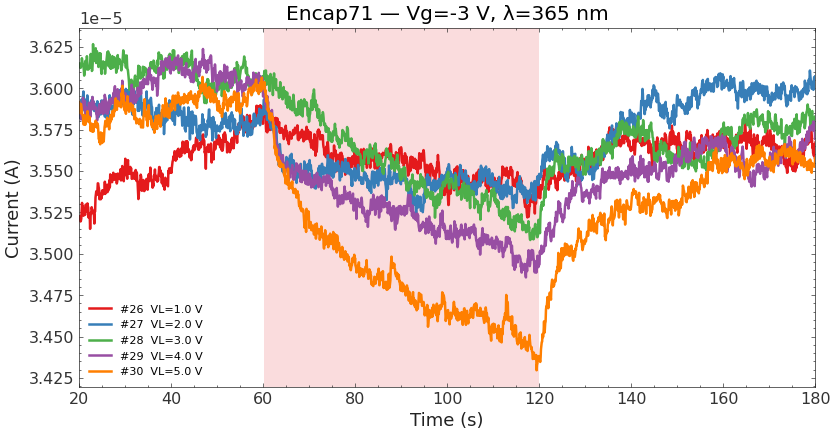

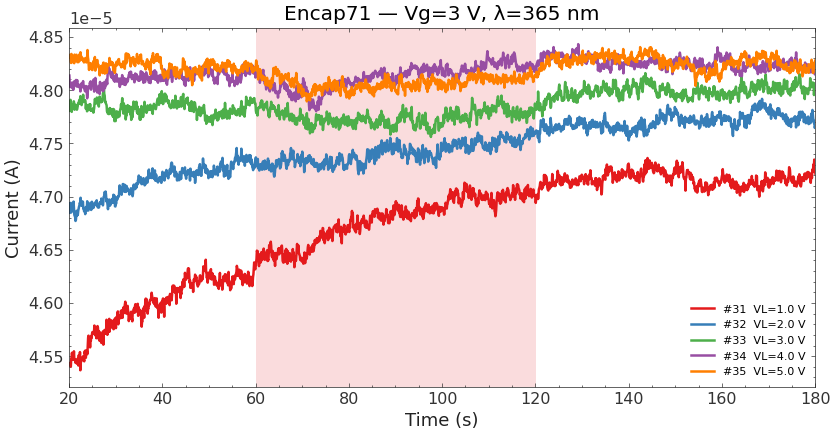

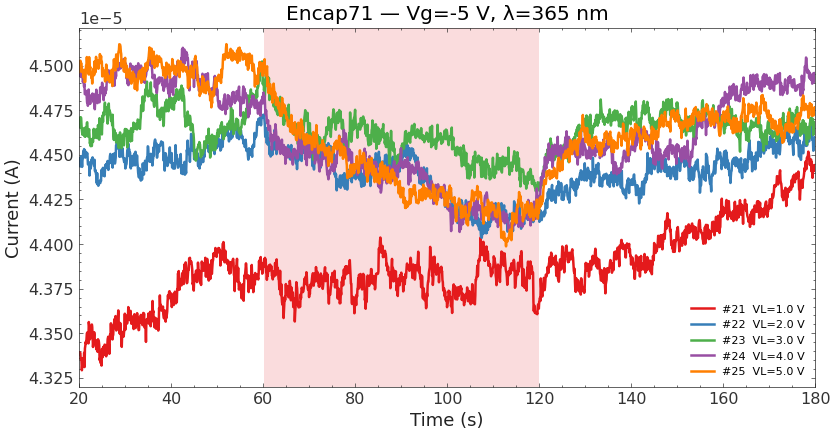

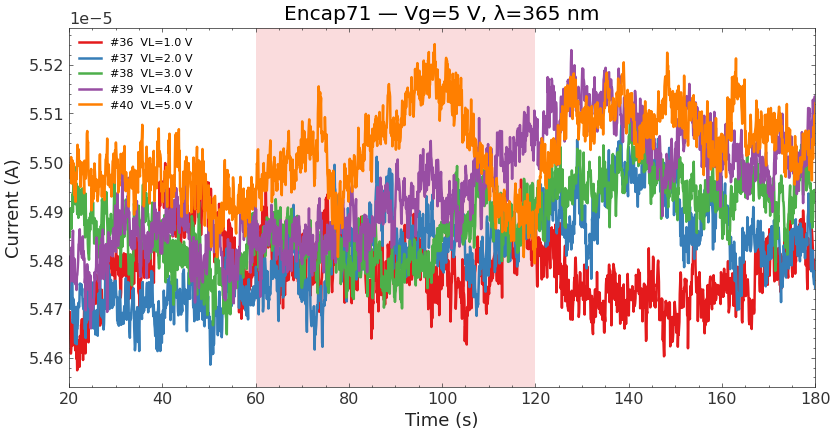

In [ ]:
plot_its_by_vg(meta, BASE_DIR, tag, vgs=[-3.0], wavelengths=[365.0]) 
plot_its_by_vg(meta, BASE_DIR, tag, vgs=[3.0], wavelengths=[365.0]) 
plot_its_by_vg(meta, BASE_DIR, tag, vgs=[-5.0], wavelengths=[365.0]) 
plot_its_by_vg(meta, BASE_DIR, tag, vgs=[5.0], wavelengths=[365.0])

saved figs/Encap71_IVg_sequence_Alisson_05_sept_metadata.png


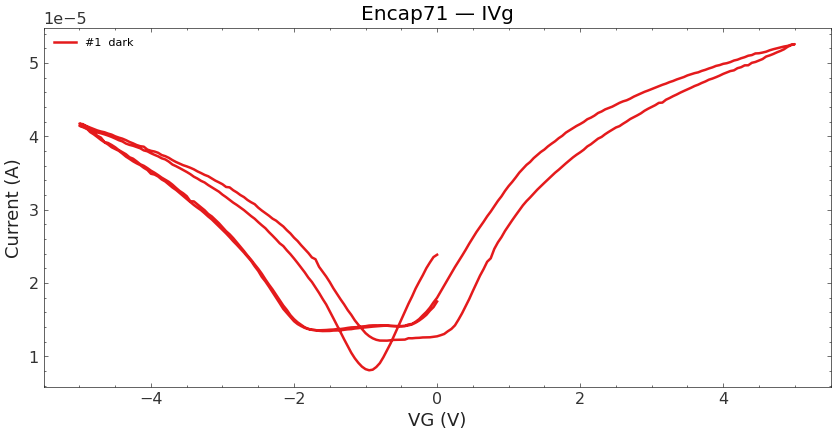

In [13]:
good_ivgs = [1]  # the _NN.csv numbers you want

meta_only_good_ivg = meta.filter(
    (pl.col("proc") == "IVg") & pl.col("file_idx").is_in(good_ivgs)
)

# Reuse your existing plotter on this subset
plot_ivg_sequence(meta_only_good_ivg, BASE_DIR, tag)